# Bay Wheels's trip Dataset Exploration
## by Chrysanthi Polyzoni

> We will be exploring data teken from [Bay Wheels Bike share service](https://www.lyft.com/bikes/bay-wheels/system-data). Bay Wheels offers affordable, accessible, and fun transportation option for everyone. [Bay Area](https://it.wikipedia.org/wiki/San_Francisco_Bay_Area) residents who qualify for CalFresh, SFMTA Lifeline Pass, or PG&E CARE utility discount are eligible to join Bike Share for All program for 5 USD for the first year — now accepting prepaid cards!

The Data
Each trip is anonymized and includes:

* Trip Duration (seconds)
* Start Time and Date
* End Time and Date
* Start Station ID
* Start Station Name
* Start Station Latitude
* Start Station Longitude
* End Station ID
* End Station Name
* End Station Latitude
* End Station Longitude
* Bike ID
* User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual

This data is provided according to the [Bay Wheels License Agreement](https://baywheels-assets.s3.amazonaws.com/data-license-agreement.html).

<a id='top'></a>
## Preliminary Wrangling

- [Gathering the Data](#aquire)
- [Assessing](#assess)
- [Cleaning](#clean)
- [Exploratory Data Analysis](#analyze)

<a id='aquire'></a>
### Gathering Data for the greater San Fransisco Bay Area:
The Data for one month of a year is saved in a zipped 'csv' File on the [Website of the Company](https://s3.amazonaws.com/baywheels-data/index.html) . As an example, the File '201801-fordgobike-tripdata.csv.zip' contains all the rides that occured in January 2018.
After programmatically downloading and unzipping all available months of the year 2018,
We will load and concatenate all <i>CSV</i> Files in a Dataframe where we will be conducting our analysis on.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

Downloading all necessary Files for the year 2019 programmatically:¶

In [3]:
import requests
import os
import zipfile

csv_downloaded = False # Set to True to prevent downloading Process from occuring \
                      #every time we re-run the notebook
filename_ford = '2019xx-fordgobike-tripdata.csv.zip'
filename_wheels = '2019xx-baywheels-tripdata.csv.zip'
base_url = 'https://s3.amazonaws.com/baywheels-data/'

datafolder = './data' # keeping all csv files in a 'data' directory, under the current directory
if not os.path.exists(datafolder):
    os.makedirs(datafolder)
    print('make {}'.format(datafolder))

for i in range(5, 13):
    if csv_downloaded:
        break
    
    iter_wheels = str(filename_wheels).replace("xx", "{:02d}".format(i))
    url = base_url + iter_wheels
    local_file = os.path.join(datafolder, iter_wheels)
    
    # download the zip file locally
    if not os.path.exists(local_file):
        print("\n{} does not exist. --> download it".format(local_file))
        try:
            response = requests.get(url)
            with open(local_file, mode='wb') as file:
                file.write(response.content)
                    # unzip file to the previously created 'data' directory
                with zipfile.ZipFile(local_file, 'r') as myzip:
                    myzip.extractall(path = datafolder)
                    print("{} --> unzipping file".format(local_file))
            os.remove(local_file)
            print("{}--> removing initial zip file".format(local_file))
        except OSError as err:
            print("OS error: {0}".format(err))
            
for i in range(1, 5):
    if csv_downloaded:
        break
    iter_ford = str(filename_ford).replace("xx", "{:02d}".format(i))
    url = base_url + iter_ford
    local_file = os.path.join(datafolder, iter_ford)

            
    if not os.path.exists(local_file):
        print("\n{} does not exist. --> download it".format(local_file))
        try:
            response = requests.get(url)
            with open(local_file, mode='wb') as file:
                file.write(response.content)
                # unzip file to the previously created 'data' directory
                with zipfile.ZipFile(local_file, 'r') as myzip:
                    myzip.extractall(path = datafolder)
                    print("{} --> unzipping file".format(local_file))
            os.remove(local_file)
            print("{}--> removing initial zip file".format(local_file))
        except OSError as err:
            print("OS error: {0}".format(err))

os.listdir(datafolder)


./data\201905-baywheels-tripdata.csv.zip does not exist. --> download it
./data\201905-baywheels-tripdata.csv.zip --> unzipping file
./data\201905-baywheels-tripdata.csv.zip--> removing initial zip file

./data\201906-baywheels-tripdata.csv.zip does not exist. --> download it
./data\201906-baywheels-tripdata.csv.zip --> unzipping file
./data\201906-baywheels-tripdata.csv.zip--> removing initial zip file

./data\201907-baywheels-tripdata.csv.zip does not exist. --> download it
./data\201907-baywheels-tripdata.csv.zip --> unzipping file
./data\201907-baywheels-tripdata.csv.zip--> removing initial zip file

./data\201908-baywheels-tripdata.csv.zip does not exist. --> download it
./data\201908-baywheels-tripdata.csv.zip --> unzipping file
./data\201908-baywheels-tripdata.csv.zip--> removing initial zip file

./data\201909-baywheels-tripdata.csv.zip does not exist. --> download it
./data\201909-baywheels-tripdata.csv.zip --> unzipping file
./data\201909-baywheels-tripdata.csv.zip--> removi

['201901-fordgobike-tripdata.csv',
 '201902-fordgobike-tripdata.csv',
 '201903-fordgobike-tripdata.csv',
 '201904-fordgobike-tripdata.csv',
 '201905-baywheels-tripdata.csv',
 '201906-baywheels-tripdata.csv',
 '201907-baywheels-tripdata.csv',
 '201908-baywheels-tripdata.csv',
 '201909-baywheels-tripdata.csv',
 '201910-baywheels-tripdata.csv',
 '201911-baywheels-tripdata.csv',
 '201912-baywheels-tripdata.csv',
 '__MACOSX']

Read csv Files and create a list of Pandas dataframes:

In [51]:
%%time

df_list = [] # list of dataframes to read the csv files in.
x= 0

for file in os.listdir(datafolder):
    if file.endswith('.csv'):
        
        col_list = ['duration_sec', 'start_time', 'end_time', 'start_station_id', 
                    'start_station_name', 'start_station_latitude', 'start_station_longitude',
                    'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude',
                    'bike_id', 'user_type']
    
        
        types = {'duration_sec': np.int32, 'start_time': 'string', 'end_time': 'string', 'start_station_id': 'string',
                 'start_station_name': 'string', 'start_station_latitude' : np.float64, 'start_station_longitude': np.float64,
                 'end_station_id': 'string', 'end_station_name':'string', 'end_station_latitude':np.float64,
                 'end_station_longitude':np.float64, 'bike_id':'string', 'user_type':'category'}
        
        df_temp = pd.read_csv('./data/' + file, dtype = types, na_values = np.nan, low_memory=False)
        
        print('\nSaving {} into Pandas Data Frame with original dimensions {}'.format(file, df_temp.shape))
        df_features = list(df_temp.columns)
        #print(df_features)
        for col in df_temp.columns:
            if col not in col_list:
                df_temp.drop(col, axis=1, inplace = True)
        print('Updated shape after dropping non consistent features in all DataFrames is {}'.format(df_temp.shape))
        df_list.append(df_temp)
        x += df_temp.shape[0]

print('\nNumber of dfs read: ', len(df_list))
print('Number of rows read: ', x)


Saving 201901-fordgobike-tripdata.csv into Pandas Data Frame with original dimensions (192082, 14)
Updated shape after dropping non consistent features in all DataFrames is (192082, 13)

Saving 201902-fordgobike-tripdata.csv into Pandas Data Frame with original dimensions (183412, 14)
Updated shape after dropping non consistent features in all DataFrames is (183412, 13)

Saving 201903-fordgobike-tripdata.csv into Pandas Data Frame with original dimensions (256299, 14)
Updated shape after dropping non consistent features in all DataFrames is (256299, 13)

Saving 201904-fordgobike-tripdata.csv into Pandas Data Frame with original dimensions (239111, 14)
Updated shape after dropping non consistent features in all DataFrames is (239111, 13)

Saving 201905-baywheels-tripdata.csv into Pandas Data Frame with original dimensions (182163, 14)
Updated shape after dropping non consistent features in all DataFrames is (182163, 13)

Saving 201906-baywheels-tripdata.csv into Pandas Data Frame with 

Concatenate the dataframes contained in the list in a single Dataframe:

In [52]:
# concatenate the dataframes contained in the list in a single Dataframe <df>:
df = pd.concat([df_each for df_each in df_list])
print('My master DataFrame consists of {} rows and {} columns.'.format(df.shape[0], df.shape[1]))
df.reset_index(drop=True, inplace=True) # generate a continuous index for all records

My master DataFrame consists of 2506983 rows and 13 columns.


In [53]:
#parse dates
df['start_time'] = pd.to_datetime(df.start_time)
df['end_time'] = pd.to_datetime(df.end_time)

### What is the structure of your dataset?

> My dataset has 2 506 983 reccords (in other words attributes or lines) and 13 columns

### What is/are the main feature(s) of interest in your dataset?

> * Trip Duration (seconds) `duration_sec`
* Start Time and Date `start_time`
* End Time and Date `end_time`
* Start Station ID `start_station_id`
* Start Station Name `start_station_name`
* Start Station Latitude `start_station_latitude`
* Start Station Longitude `start_station_longitude`
* End Station ID `end_station_id`
* End Station Name `end_station_name`
* End Station Latitude `end_station_latitude`
* End Station Longitude `end_station_longitude`
* Bike ID `bike_id`
* User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual `user_type`


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I really do not feel like doing any kind of geo analysis so I will not be using coordinates. Here below features I will be using
* Trip Duration (seconds) `duration_sec`
* Start Time and Date `start_time`
* End Time and Date `end_time`
* Start Station ID `start_station_id`
* Start Station Name `start_station_name`
* End Station ID `end_station_id`
* End Station Name `end_station_name`
* Bike ID `bike_id`
* User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual `user_type`

[Back to Top](#top)

<a id='assess'></a>
### Assessing Data for the greater San Fransisco Bay Area:

#### First Glance at the Dataframe using info(), describe(), head(), tail()

In [54]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,229,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber
1,65900,2019-01-31 20:58:33.886,2019-02-01 15:16:54.173,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,134,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber
2,62633,2019-01-31 18:06:52.924,2019-02-01 11:30:46.530,245,Downtown Berkeley BART,37.870139,-122.268422,157,65th St at Hollis St,37.846784,-122.291376,2717,Customer
3,44680,2019-01-31 19:46:09.719,2019-02-01 08:10:50.318,85,Church St at Duboce Ave,37.770083,-122.429156,53,Grove St at Divisadero,37.775946,-122.437777,4557,Customer
4,60709,2019-01-31 14:19:01.541,2019-02-01 07:10:51.065,16,Steuart St at Market St,37.794130,-122.394430,28,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer


In [55]:
df.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
2506978,731,2019-12-28 18:37:29,2019-12-28 18:49:40,<NA>,<NA>,37.809731,-122.409855,<NA>,<NA>,37.807573,-122.421681,719651,Subscriber
2506979,748,2019-12-28 18:37:24,2019-12-28 18:49:53,<NA>,<NA>,37.809768,-122.409797,<NA>,<NA>,37.807558,-122.421638,655411,Subscriber
2506980,1044,2019-12-26 14:25:37,2019-12-26 14:43:02,<NA>,<NA>,37.810183,-122.410271,<NA>,<NA>,37.807225,-122.408850,936881,Subscriber
2506981,326,2019-12-30 20:35:43,2019-12-30 20:41:09,<NA>,<NA>,37.810471,-122.417386,<NA>,<NA>,37.803143,-122.414373,397539,Subscriber
2506982,4023,2019-12-31 19:26:48,2019-12-31 20:33:52,<NA>,<NA>,37.811042,-122.418149,<NA>,<NA>,37.810970,-122.418054,662304,Subscriber


In [56]:
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 13 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int32         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         string        
 4   start_station_name       string        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           string        
 8   end_station_name         string        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  string        
 12  user_type                category      
dtypes: category(1), datetime64[ns](2), float64(4), int32(1), string(5)
memory usage: 222.3 MB
None


,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude
count,2.506983e+06,2.506983e+06,2.506983e+06,2.506983e+06,2.506983e+06
mean,8.076483e+02,3.776506e+01,-1.223499e+02,3.776422e+01,-1.223459e+02
std,1.974714e+03,1.363698e-01,3.089648e-01,2.392885e-01,7.080417e-01
min,6.000000e+01,0.000000e+00,-1.225143e+02,0.000000e+00,-1.225143e+02
25%,3.590000e+02,3.776931e+01,-1.224130e+02,3.777003e+01,-1.224117e+02
50%,5.710000e+02,3.778053e+01,-1.223983e+02,3.778076e+01,-1.223981e+02
75%,8.870000e+02,3.779539e+01,-1.222914e+02,3.779587e+01,-1.222934e+02
max,9.121100e+05,4.551000e+01,0.000000e+00,4.551000e+01,0.000000e+00


#### Explore missing Values

In [63]:
df.isnull().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id           80734
start_station_name         80133
start_station_latitude         0
start_station_longitude        0
end_station_id             82902
end_station_name           82350
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
dtype: int64

- Quality Issue #1: Missing values in 'start_station_id' Column
- Quality Issue #2: Missing values in 'start_station_name' Column
- Quality Issue #3: Missing values in 'end_station_id ' Column
- Quality Issue #4: Missing values in 'end_station_id ' Column

Inspect the rows with missing values for the station_id and/or station name

In [173]:
end_nostation = df.loc[df.end_station_id.isnull() | df\
                               .end_station_name.isnull()]
end_nostation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82902 entries, 2023 to 2506982
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   duration_sec             82902 non-null  int32         
 1   start_time               82902 non-null  datetime64[ns]
 2   end_time                 82902 non-null  datetime64[ns]
 3   start_station_id         18990 non-null  string        
 4   start_station_name       19264 non-null  string        
 5   start_station_latitude   82902 non-null  float64       
 6   start_station_longitude  82902 non-null  float64       
 7   end_station_id           0 non-null      string        
 8   end_station_name         552 non-null    string        
 9   end_station_latitude     82902 non-null  float64       
 10  end_station_longitude    82902 non-null  float64       
 11  bike_id                  82902 non-null  string        
 12  user_type                82

In [175]:
end_nostation.groupby(end_nostation['end_time'].dt.month).describe().duration_sec

,count,mean,std,min,25%,50%,75%,max
end_time,,,,,,,,
1,256.0,1527.371094,4340.221033,63.0,399.75,670.5,1207.50,52897.0
2,197.0,890.152284,947.517539,66.0,341.00,660.0,999.00,8209.0
3,221.0,1224.316742,2840.181689,74.0,370.00,695.0,1052.00,34005.0
4,64.0,1634.734375,2513.386890,94.0,547.75,1033.0,1514.50,13460.0
5,15.0,915.933333,392.292068,484.0,600.00,846.0,1148.50,1927.0
6,2262.0,856.406720,1033.681385,60.0,346.00,570.0,986.25,16516.0
7,57576.0,914.364735,1345.663985,60.0,399.00,641.0,1043.00,61869.0
11,971.0,1334.411946,2165.359206,60.0,237.50,478.0,1263.50,19798.0
12,21340.0,831.898922,6338.601802,60.0,316.00,538.5,923.00,912110.0


In [176]:
start_nostation = df.loc[df.start_station_id.isnull() | df\
                               .start_station_name.isnull()]
start_nostation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80734 entries, 2023 to 2506982
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   duration_sec             80734 non-null  int32         
 1   start_time               80734 non-null  datetime64[ns]
 2   end_time                 80734 non-null  datetime64[ns]
 3   start_station_id         0 non-null      string        
 4   start_station_name       601 non-null    string        
 5   start_station_latitude   80734 non-null  float64       
 6   start_station_longitude  80734 non-null  float64       
 7   end_station_id           16822 non-null  string        
 8   end_station_name         17069 non-null  string        
 9   end_station_latitude     80734 non-null  float64       
 10  end_station_longitude    80734 non-null  float64       
 11  bike_id                  80734 non-null  string        
 12  user_type                80

In [177]:
start_nostation.groupby(start_nostation['start_time'].dt.month).describe().duration_sec

,count,mean,std,min,25%,50%,75%,max
start_time,,,,,,,,
1,248.0,1287.653226,2917.716973,63.0,391.25,662.0,1180.75,30016.0
2,197.0,890.152284,947.517539,66.0,341.00,660.0,999.00,8209.0
3,221.0,1224.316742,2840.181689,74.0,370.00,695.0,1052.00,34005.0
4,64.0,1634.734375,2513.386890,94.0,547.75,1033.0,1514.50,13460.0
5,15.0,915.933333,392.292068,484.0,600.00,846.0,1148.50,1927.0
6,2160.0,816.013426,883.208832,60.0,335.75,559.0,967.50,12907.0
7,55887.0,895.760714,1247.187489,60.0,403.00,644.0,1039.00,61869.0
11,923.0,1381.891658,2250.431952,60.0,242.00,472.0,1294.50,19798.0
12,21019.0,835.618583,6404.964898,60.0,319.00,545.0,927.00,912110.0


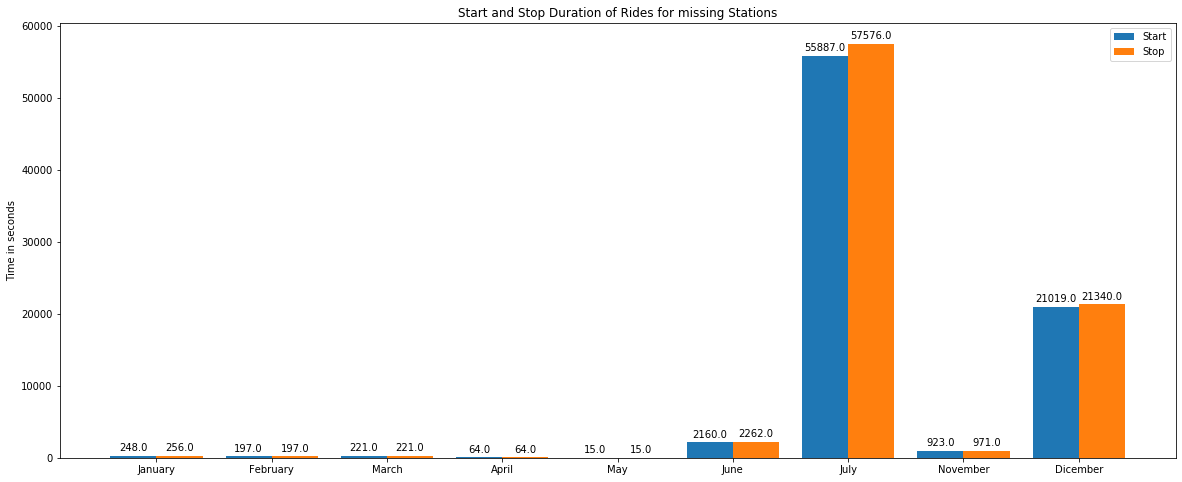

In [178]:
import seaborn as sns
start = list((start_nostation.groupby(start_nostation['start_time'].dt.month).describe().duration_sec)['count'])
stop = list((end_nostation.groupby(end_nostation['end_time'].dt.month).describe().duration_sec)['count'])
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'November', 'Dicember']

x = np.arange(len(months))  # the label locations
width = 0.40  # the width of the bars


fig, ax = plt.subplots(figsize=(20,8))

rects1 = ax.bar(x - width/2, start, width, label='Start')
rects2 = ax.bar(x + width/2, stop, width, label='Stop')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time in seconds')
ax.set_title('Start and Stop Duration of Rides for missing Stations')
ax.set_xticks(x)
ax.set_xticklabels(months)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)

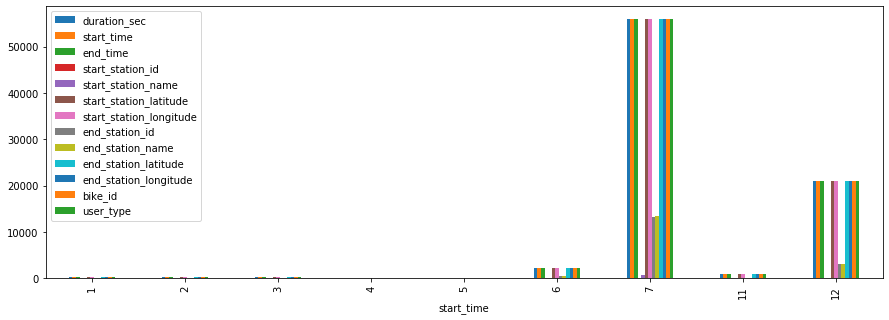

In [191]:
start_nostation.groupby(start_nostation['start_time'].dt.month).count().plot(kind = 'bar', figsize=(15, 5));

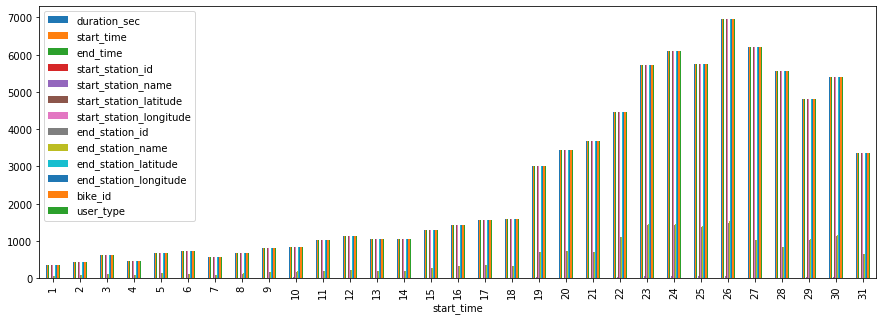

In [180]:
start_nostation.groupby(start_nostation['start_time'].dt.day).count().plot(kind = 'bar', figsize=(15, 5));

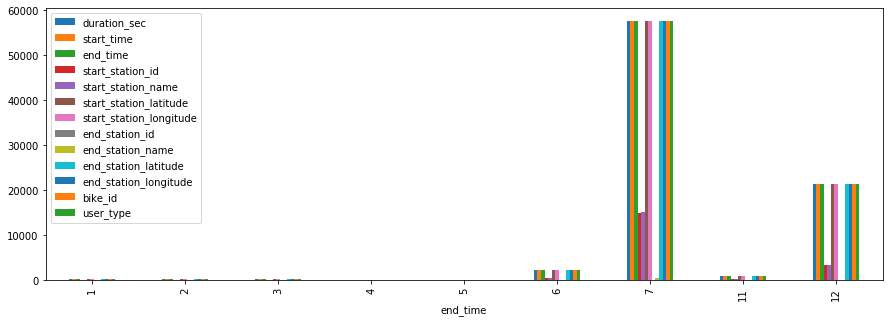

In [181]:
end_nostation.groupby(end_nostation['end_time'].dt.month).count().plot(kind = 'bar', figsize=(15, 5));

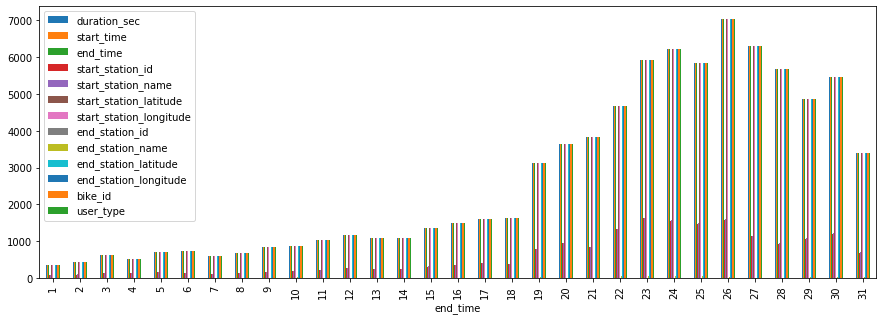

In [185]:
end_nostation.groupby(end_nostation['end_time'].dt.day).count().plot(kind = 'bar', figsize=(15, 5));

In [192]:
df.duplicated().sum()

0

In [193]:
df.bike_id.nunique()

11070

#### Conclusion while assessing the Dataset:
We found some quality issues related to missing values and wrong data types. There are otherwise no tidiness Issues and no duplicate Entries.

It looks like in June and September a lot of missing values occured. It looks like a technical problem might have occured. However such data can retrieved by geospatial information we happen to posess.

[Back To Top](#top)

<a id='clean'></a>
### Cleaning Data for the greater San Fransisco Bay Area:

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!